이 보고서는 Python 언어를 사용하며, Jupiter 프로젝트를 이용하여 작성하였습니다.

* 문서 URL : http://wikibootup.github.io/etc/AC-analysis/Fourier-Series/odd-function/odd_square_fft.html

구현에 앞서, 

기본적인 설정을 하겠습니다. ( 주기함수 및 푸리에 변환을 위한 함수 및 그래프 관련 설정 )

다음 글이(==== 표시) 나올 때까지 건너 뛰셔도 좋습니다.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
"""
basic configurations for plot

"""


font = {'family' : 'serif',
        'weight' : 'black',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np


"""
Functions for FFT
Many part of implementation is derived from plotly
https://plot.ly/
"""


def fft_configuration(period_function):
    n = len(period_function) # length of the signal

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    k = np.arange(n)
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    return (Y, frq)


def make_plot_amp_and_freq(time_vector, period_function):
    Y, frq = fft_configuration(period_function)
    
    fig, ax = plt.subplots(2, 1, figsize=(15,15))
    
    ax[0].plot(time_vector, y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')

    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('Amplitude')
    


def time_vector_configuration(one_side_width=1):
    Fs = 150.0;  # sampling rate
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(
        negative(one_side_width),
        one_side_width,
        Ts) # time vector
    
    return t

In [4]:
from scipy import signal


"""
Functions for wave generator 
"""


def pwm_generator(l, amp=1, duty=0.5):
    return (lambda duty:
                list(map(lambda elem: 0 if elem < duty else amp, l))
           )((1-duty)*amp)

def make_square_odd(period=1, amp=1, duty=0.5):
    def _make_square_odd(w0):
        return (
            lambda square:
                pwm_generator(square, amp, duty)
            )(amp * abs(signal.sawtooth(w0*t)))
    return _make_square_odd(2*pi/period)

In [5]:
"""
The cases & calcuate T using the cases
"""


cases_tau_coeffs = {
    "T=10tau": 10,
    "T=5tau": 5,
    "T=2.5tau": 2.5,
    "T=2tau": 2
}


def tau_of_T(T, key):
    return T * (1/cases_tau_coeffs.get(key))

In [6]:
t = time_vector_configuration(one_side_width=3)

==========================

아래 신호에 대하여 다음의 보고서를 작성하시오.
==========
Fourier series를 구하시오.  
$a_0, an, bn 구하기 (T와 τ의 함수로)$  
위의 결과를 sinc 함수를 이용하여 표시해 볼 것  

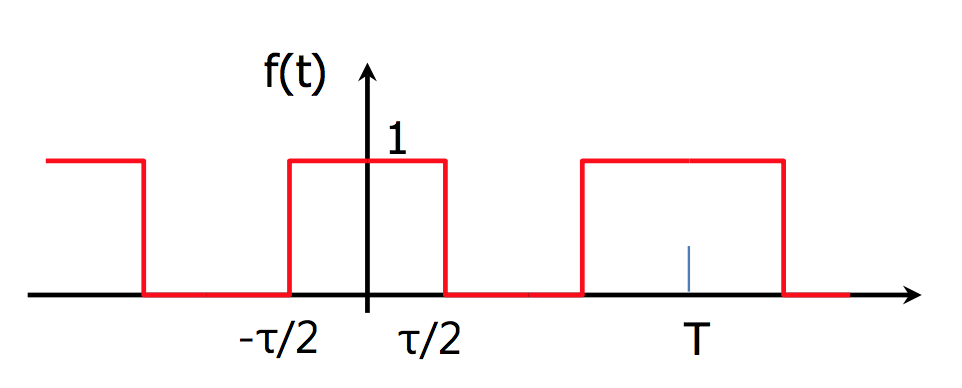

In [7]:
from IPython.display import Image
Image(filename='img/waves/odd_square.png')

\* $f(t)는 우함수입니다. 우함수의 성질인\ f(t) = f(-t)를 이용해서, 적분 구간은 1/2로 줄이고 크기를 2배로 늘리도록 하겠습니다.$

# 1. 각 성분값 구하기

## * $a_0$는 평균값입니다. 즉, 
## $ a_0 = \frac{크기 * 켜져있는 시간}{주기} = \frac{A\tau}{T} = \frac{\tau}{T} $

## * $a_n = \frac{4}{T} \int_0^\frac{\tau}{2} \! f(x) cos(nw_0t) \, \mathrm{d}t.$
##      $ = \frac{4}{T} A\frac{1}{nw_0} sin(nw_0t)|_0^\frac{\tau}{2},\ (A = f(x))$
##      $ = \frac{2A}{n\pi} sin(\frac{n\pi\tau}{T})$

## * $b_n = 0, \because\ f(x)$는 우함수 성분만 존재하므로


# 2. sinc 함수 적용

## $sinc(x) = \frac{sin(x)}{x}$임을 이용하여 a_n의 결과에 대입하면,
## $ a_n = \frac{2A}{n\pi} \frac{n\pi\tau}{T} sinc(\frac{n\pi\tau}{T})$



* 로피탈의 법칙에 따라, $sinc(0) = 1 (DC), sinc(\infty) = \infty (impulse)$

이것은 $\tau$ 값이 클 수록 함수의 기울기가 완만해지고, 작을 수록 날카로워 진다는 것을 의미합니다.

아래에 일반적인 sinc(x)와 대조되는 두 경우를 구현하였습니다. (축의 눈금들은 n을 기준으로 하지 않은 상태입니다.)

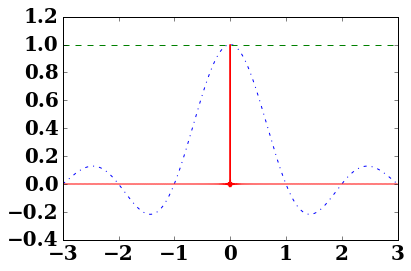

In [9]:
A = 1
T = 1
virtual_infinity = 1000

plot(t, sinc(t), linestyle='-.')
plot(t, sinc(t*0), linestyle='--')
plot(t, sinc(t*virtual_infinity))

\* τ값에 따른 변화에 대하여 분석해 보시오. (T 고정)
--------------
T = 10τ, T = 5τ, T = 2.5τ, T = 2τ의 경우를 나누어 분석  
반드시 각 경우에 대한 amplitude spectrum을 그릴 것 예) PSPICE 또는 MATLAB 이용

\* $T = 10τ, ( T = 1 고정 )$
--------------

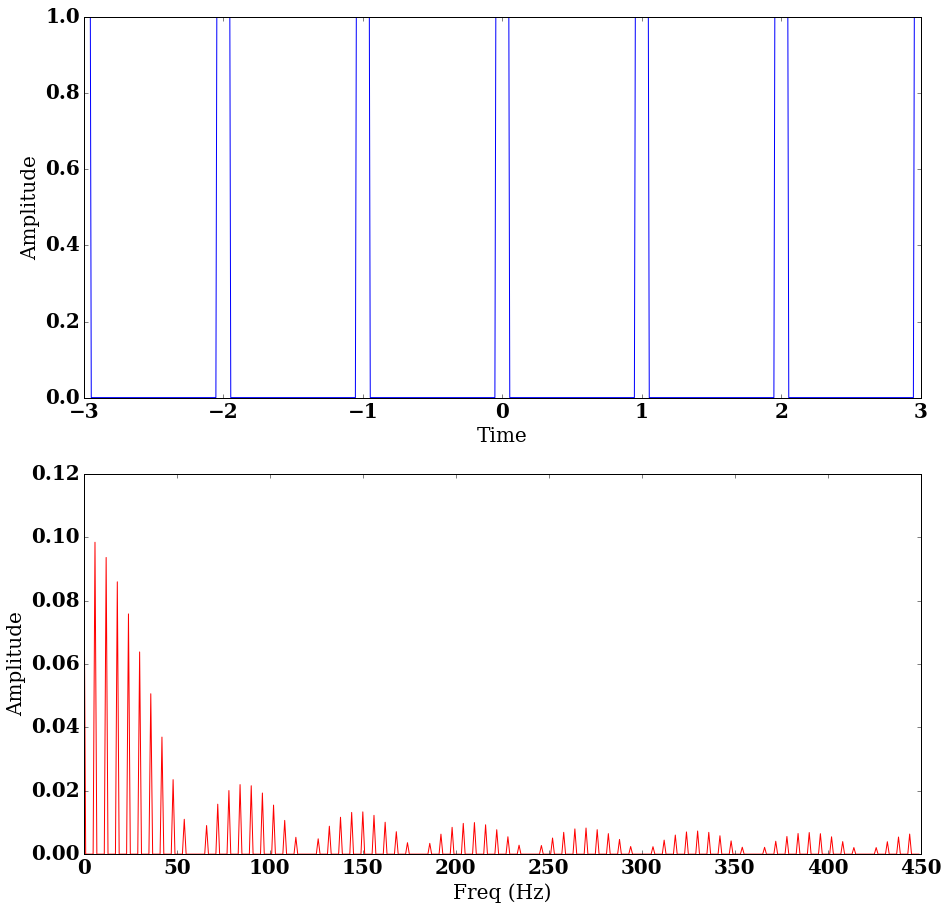

In [10]:
T = 1
y = make_square_odd(period=T, duty=tau_of_T(T, "T=10tau"))
make_plot_amp_and_freq(t, y)

\* $T = 5τ, ( T = 1 고정 )$
--------------

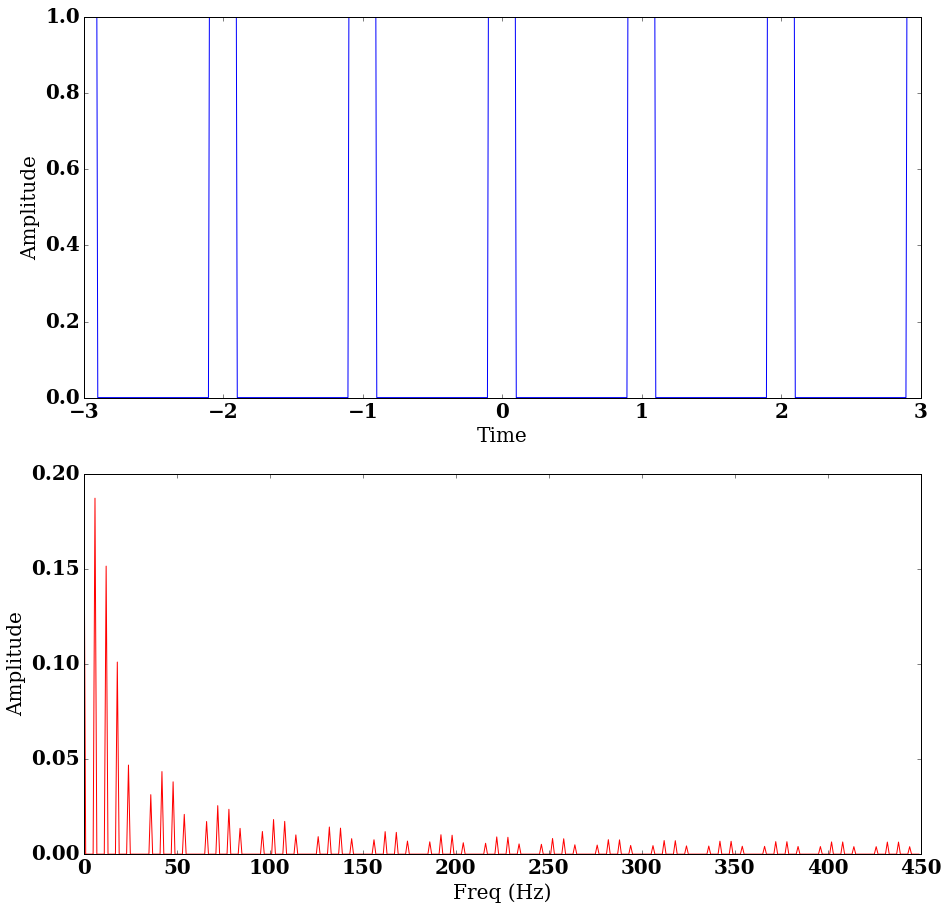

In [11]:
y = make_square_odd(period=T, duty=tau_of_T(T, "T=5tau"))
make_plot_amp_and_freq(t, y)

\* $T = 2.5τ, ( T = 1 고정 )$
--------------

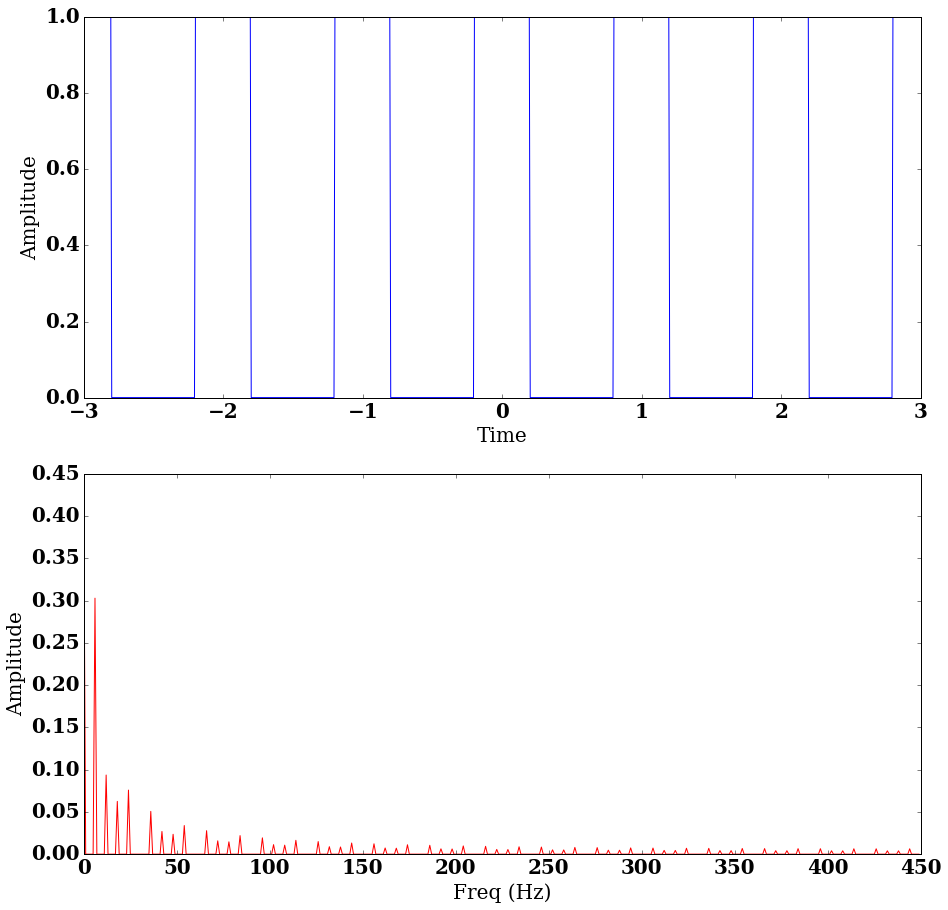

In [13]:
y = make_square_odd(period=T, duty=tau_of_T(T, "T=2.5tau"))
make_plot_amp_and_freq(t, y)

\* $T = 2τ, ( T = 1 고정 )$
--------------

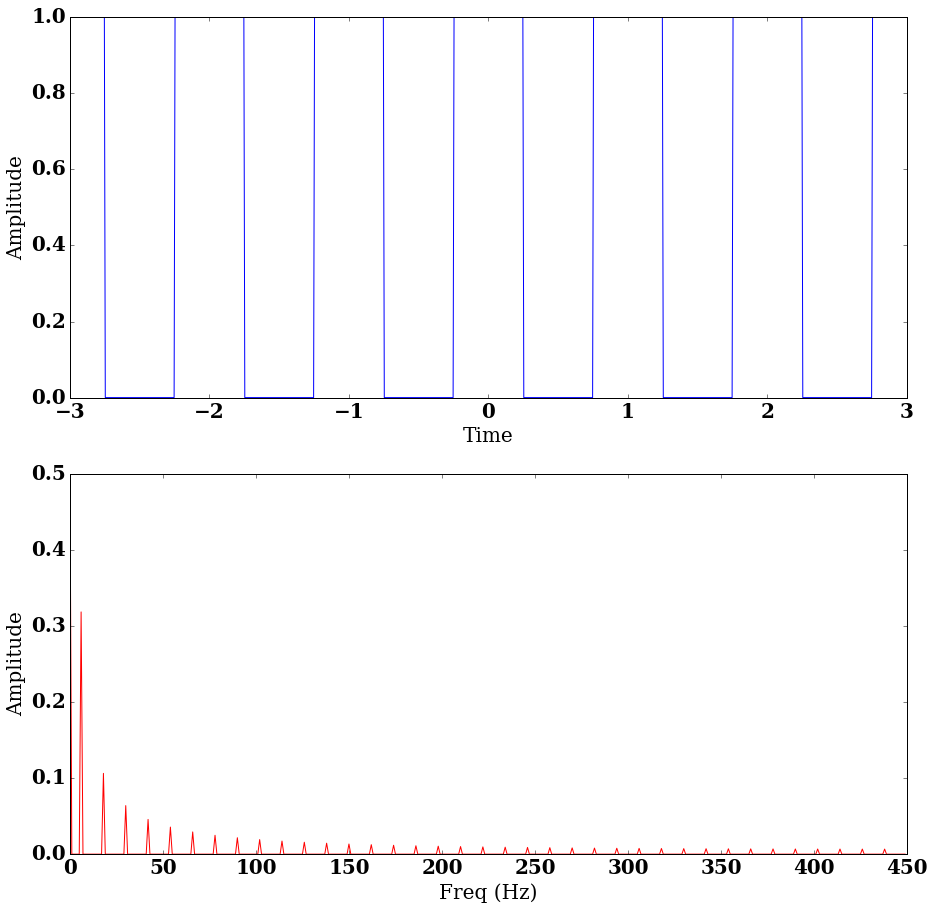

In [16]:
y = make_square_odd(period=T, duty=tau_of_T(T, "T=2tau"))
make_plot_amp_and_freq(t, y)

## 결론.

1 : 듀티비($\frac{\tau}{/T}$)가 감소할 수록, 주기를 중심으로 주파수에 따른 변화폭이 컸습니다. 한주기마다 진폭은 감소되지만 똑같은 비율의 패턴을 가지는 공 튀기듯 통통 튀는 형태를 보였습니다. 이것은 푸리에계수를 구하는 과정에서 삼각함수를 이용하는 것과 관련이 있었습니다. 듀티비가 감소할 수록 한주기 당 포함되는 n의 개수가 늘어났기 때문입니다.

2 : 반면, 듀티비가 증가할 수록 주파수 성분은 0Hz에 몰리는 것을 보여주었습니다. 즉, DC에 가까워지는 것이었습니다.

3 : 듀티비가 바뀌어도 함수의 위상값$\phi$은 변화가 없습니다. ( $\pi or\ -\pi$ )

## 고찰

1 : 기함수 사각파에 $a_n$ 성분이 없는 이유는 푸리에 급수의 원리를 통해서 알 수 있습니다. 이미 우함수, 기함수적인 성질을 통해서 예상 가능하지만 삼각함수의 합으로 사각파를 만들 수 있습니다. 예를 들어, 기함수이고 $T=2\tau$인 경우, 아래와 같은 합성파를 만들 수 있습니다. 

* 하지만 우함수로는 단순히 cos성분만 더한다고 파형이 만들어지지 않았습니다. 다른 요소가 더 필요한 것 같은데, $b_n과 cos$파를 곱해서 계산해야 만들어질 것 같습니다.

reference : https://www.eecis.udel.edu/~boncelet/ipython.html

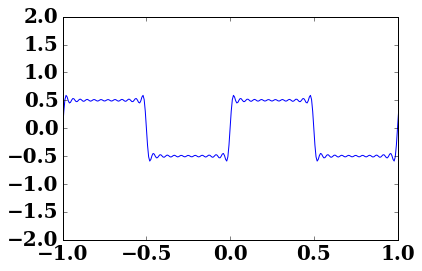

In [14]:
plt.ylim(-2, 2)
plt.xlim(-1, 1)

odds = zeros(len(t))
for n in arange(1,25,2):
    odds += (2/(pi*n))*sin(2*pi*n*t)

plot(t, odds)